---

###### In the next project, the data of Yandex Afisha in June 17' till May 18' will be analyzed in order to learn how product users behave in matters of duration and frequency of usage or shopping, how the revenue and the marketing costs are changing over time and between sources. The aim of the project is to gain knowledge about the business metrics of the product and provide suggestions based on data. 

### Download and prepare the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\NELLY\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
try:
    visits= pd.read_csv('C:/Users/NELLY/Downloads/visits_log_us.csv')
except:
    visits= pd.read_csv('/datasets/visits_log_us.csv')
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Visits table includes information about users' logs on website visits, first we will change the variable names to lower case. We see that there are no missing values but the date columns need to be changed to a date datatype. Additionaly, we will check how many unique values 'Device' column includes, and if there are a few, we'll change its type to a category. 

In [4]:
#changing the column names to lowercase:
visits.columns = visits.columns.str.lower()
#changing datatypes to datetime:
visits['start ts'] =  pd.to_datetime(visits['start ts'])
visits['end ts'] =  pd.to_datetime(visits['end ts']) 

In [5]:
visits['device'].value_counts()
#Changing the data type to categorical b/c there are only two unique values:
visits['device'] = visits['device'].astype('category') 

In [6]:
#checking duplicates
visits.duplicated().value_counts()

False    359400
Name: count, dtype: int64

In [7]:
try:
    orders= pd.read_csv('C:/Users/NELLY/Downloads/orders_log_us.csv')
except:
    orders= pd.read_csv('/datasets/orders_log_us.csv')
    
orders.head()


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


The order table includes data on orders, it does not include missing values but there is a need to change its variables to lowercase and to change 'Buy Ts' to a datetime type.

In [9]:
#changing the column names to lowercase:
orders.columns = orders.columns.str.lower()
#changing datatypes to datetime:
orders['buy ts'] =  pd.to_datetime(orders['buy ts'])

In [10]:
#checking duplicates
orders.duplicated().value_counts()

False    50415
Name: count, dtype: int64

In [11]:
try:
    costs= pd.read_csv('C:/Users/NELLY/Downloads/costs_us.csv')
except:
    costs= pd.read_csv('/datasets/costs_us.csv')
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Costs table includes information about marketing expenses, it does not have missing values but there is a need to change 'dt' variable to a datetime type.

In [13]:
#changing datatypes to datetime:
costs['dt'] =  pd.to_datetime(costs['dt'])

In [14]:
#checking duplicates
costs.duplicated().value_counts()

False    2542
Name: count, dtype: int64

### Calculate metrics

### Product:

#### Calculating how many customers use the product every day, week, and month

In [15]:
#adding date, year, week and month cols:
visits['week'] = visits['start ts'].values.astype('datetime64[W]')
visits['month'] = visits['start ts'].values.astype('datetime64[M]')
visits['date'] = visits['start ts'].dt.date
visits['date']=pd.to_datetime(visits['date'])


In [16]:
visits

,device,end ts,source id,start ts,uid,week,month,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-21,2017-12-01,2017-12-27
...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-27,2017-07-01,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-01,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-01,2018-03-01,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-01,2017-11-02


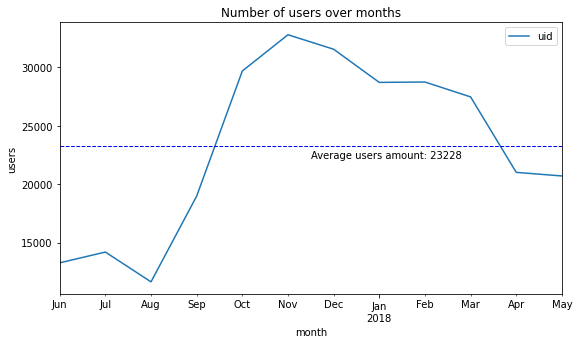

In [17]:
visits_mau= visits.groupby(['month'])['uid'].nunique().reset_index()
fig, ax = plt.subplots(figsize=(9, 5))
plt.title("Number of users over months")
visits_mau.plot(x='month', y='uid', ax=ax)
plt.ylabel('users')
plt.axhline(y=visits_mau['uid'].mean(),xmin=0.0, xmax=1.0, color='b', linestyle='dashed', linewidth=1)
plt.text(0.5, 0.5, f"Average users amount: {int(visits_mau['uid'].mean())}", transform=ax.transAxes)
plt.show()


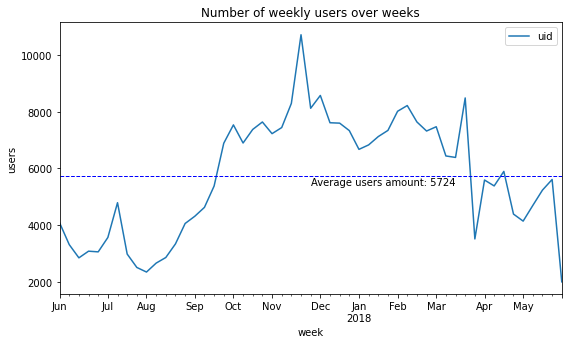

In [18]:
visits_wau= visits.groupby(['week'])['uid'].nunique().reset_index()
fig, ax = plt.subplots(figsize=(9, 5))
plt.title("Number of weekly users over weeks")
visits_wau.plot(x='week', y='uid', ax=ax)
plt.ylabel('users')
plt.axhline(y=visits_wau['uid'].mean(),xmin=0.0, xmax=1.0, color='b', linestyle='dashed', linewidth=1)
plt.text(0.5, 0.4, f"Average users amount: {int(visits_wau['uid'].mean())}", transform=ax.transAxes)
plt.show()

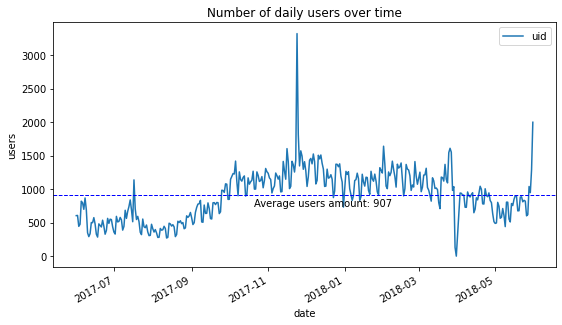

In [19]:
visits_dau= visits.groupby(['date'])['uid'].nunique().reset_index()
fig, ax = plt.subplots(figsize=(9, 5))
plt.title("Number of daily users over time")
visits_dau.plot(x='date', y='uid', ax=ax)
plt.ylabel('users')
plt.axhline(y=visits_dau['uid'].mean(),xmin=0.0, xmax=1.0, color='b', linestyle='dashed', linewidth=1)
plt.text(0.4, 0.25, f"Average users amount: {int(visits_dau['uid'].mean())}", transform=ax.transAxes)
plt.show()

We see that just from August 2017 there was a constant rising in the number of users until November-December and from then a moderate decline. In April 18' we see a sudden drop, seems like in a specific week or few days.

#### Calculating customers' number of sessions per day

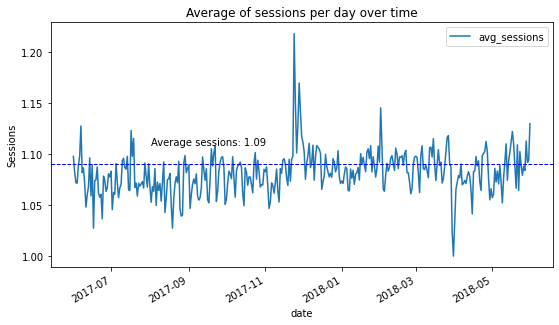

In [20]:
visits_day= visits.groupby(['date'])[['uid','source id']].agg({'uid':'nunique', 'source id':'count'}).reset_index()
visits_day['avg_sessions']=visits_day['source id']/visits_day['uid']
fig, ax = plt.subplots(figsize=(9, 5))
plt.title("Average of sessions per day over time")
visits_day.plot(x='date', y='avg_sessions', ax=ax)
plt.ylabel('Sessions')
plt.axhline(y=round(sum(visits_day['source id'])/sum(visits_day['uid']),2),xmin=0.0, xmax=1.0, color='b', linestyle='dashed', linewidth=1)
plt.text(0.2, 0.5, f"Average sessions: {round(sum(visits_day['source id'])/sum(visits_day['uid']),2)}", transform=ax.transAxes)
plt.show()

Similarly to the trends seen in DAW, MAU and WAU, we see a peak in December 17' and a drop around April 18'. This means that in these dates, not only that the amount of users increased/decreased, but also the number of sessions each user had each day.

#### Calculating customers' session lengths

In [21]:
#creating a variable of duration of session:
visits['session_dur_sec'] = (visits['end ts'] - visits['start ts']).dt.seconds

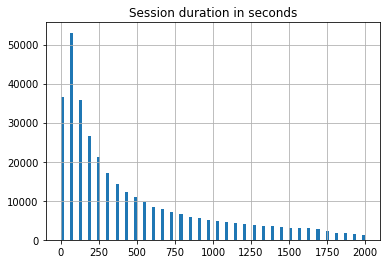

In [22]:
visits['session_dur_sec'].hist(bins=100, range=(0,2000))
plt.title('Session duration in seconds')
plt.show()

In [23]:
visits['session_dur_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_dur_sec, dtype: float64

In [24]:
visits['session_dur_sec'].mode() #mode is 60 seconds
round(len(visits[visits['session_dur_sec']==60])/visits.shape[0],2) #only 15% of the data is 60 seconds

0.15

In [25]:
print(f"The average session length is: \n{visits['session_dur_sec'].median()}")

The average session length is: 
300.0


We can see that the distribution of session duration is not normal - its extremely skewed and the median value is less than half of the average value. On the other hand, the most common value is 60 seconds and constitutes only 15% of the values, while the values vary a lot, for that reason, we choose the median as a metric for the ASL.

#### What's the user retention rate?
The period that was chosen for users' retention rate is in month, since initial check showed that users use the product for long periods and presenting its metrics in short periods like weeks will be too much detailed. 

In [26]:
#creating a table with user's first activity date:
first_activity_date = visits.groupby(['uid'])['date'].min().reset_index()
first_activity_date.columns = ['uid', 'first_session']
first_activity_date.head()
#adding the values to the df:
visits = visits.merge(first_activity_date, on='uid', how='inner')
#visits.head()

In [27]:
#creating columns for the 1st day of the week of the activity and of the first recorded activity:
visits['first_activity_month'] = visits['first_session'].values.astype('datetime64[M]')
#creating column for the lifetime in cohort
visits['cohort_lifetime'] = ((visits['month'] - visits['first_activity_month'])/ np.timedelta64(1, 'M')).round()
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype(int)



In [28]:
visits.head()

,device,end ts,source id,start ts,uid,week,month,date,session_dur_sec,first_session,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017-12-20,1080,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018-02-19,1680,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017-07-01,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018-05-20,1440,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-08,2018-03-01,2018-03-09,1680,2018-03-09,2018-03-01,0


In [29]:
#creating table with count of users in each month and lifetime
cohorts = visits.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='uid',aggfunc='nunique')
#cohorts

In [30]:
retention=cohorts.iloc[:,0:].div(cohorts[0], axis=0)
#retention

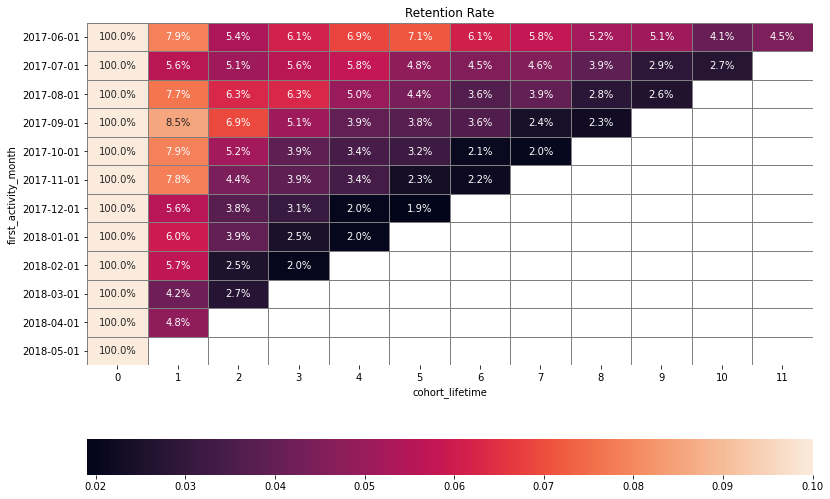

In [31]:
# the first line just formats cohort into a str for a nicer output
retention.index=retention.index.astype(str)
plt.figure(figsize=(13, 9))
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'}).set(title = 'Retention Rate')
plt.show()

Overall, the retention rates are low, we see a big drop from 0 cohort lifetime to first cohort lifetime, but the numbers are steady meaning that the product has loyal users that keep using it even after almost a year.
The first month retention rate is inconsistent and there are three cohorts that do not use at all the product in the first month, but use it again on the second month.
The second month retention rate is decreasing for each new cohort, with exception for Sep-2017 cohort, meaning that user behavior is changing with every new cohort.

###### In summary, there are 907 daily users which use the product in 987 sessions, meaning that some of the users use the product more than one time a day. The sessions vary a lot in their length but the average session length is 300 seconds. The users of the app are loyal to the product but only few of the initial users keep on using it after their first month. Users from different cohorts (which started using the app in different months) show different user behavior, expressed in decreasing retention rate. 

### Sales:

#### Calculating customers' conversion duration

In [32]:
orders['uid'].nunique()

36523

The difference between number of orders (50,415) and the unique id's (36,523) meaning that there are users who made more than one order. Next, we will create tables with user's first activity, first order time and information about the orders. By joining them to visits table we will have the relevant information to answer the question above. 

In [33]:
first_activity_time = visits.groupby(['uid'])['start ts'].min().reset_index()
first_order_time = orders.groupby(['uid']).agg({'buy ts':'min'}).reset_index()
first_order_time = first_order_time.rename(columns={'buy ts': 'first_order_time'})


In [34]:
first_activity_time.shape[0] #228169

228169

In [35]:
first_order_time.shape[0] #36523

36523

In [36]:
#the share of paying users from all the users:
round(first_order_time.shape[0]/first_activity_time.shape[0],2)

0.16

In [37]:
conversion = pd.merge(first_activity_time, first_order_time, on='uid')
conversion['conversion']=((pd.to_datetime(conversion['first_order_time'])-pd.to_datetime(conversion['start ts']))/np.timedelta64(1,'D')).astype('int')
#conversion

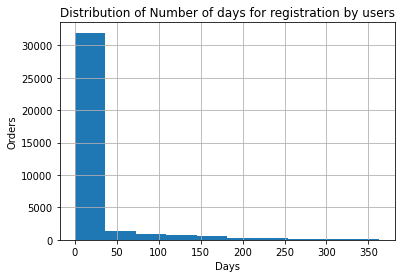

In [38]:
conversion['conversion'].hist()
plt.ylabel('Orders')
plt.xlabel('Days')
plt.title('Distribution of Number of days for registration by users')
plt.show()

In [39]:
conversion['conversion'].describe()

count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion, dtype: float64

We can see that the time between registration (the date of starting first use in the product) and first purchase varies a lot between users - in average it takes them 16 days, but for half of them it takes less than a day. 

#### Calculating customers' order frequency
To answer the question we will analyze the average amount of orders by user per monthly cohort.

In [40]:
orders=orders.merge(first_order_time, on='uid')

In [41]:
orders['first_order_month']=orders['first_order_time'].values.astype('datetime64[M]')
orders['month']=orders['buy ts'].values.astype('datetime64[M]')

In [42]:
#creating a table with num of users in each cohort (ordered for the first time in that month):
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns=['first_order_month','cohort_size']
#cohort_sizes.head()

In [43]:
#calculating number of purchases for cohort and month
cohort=orders.groupby(['first_order_month','month'])['revenue'].count().reset_index()
cohort.columns=['first_order_month','month','orders']
#merge cohort with cohort size
cohort=cohort.merge(cohort_sizes,on=['first_order_month'])
cohort['age'] = ((cohort['month'] - cohort['first_order_month']) / np.timedelta64(1,'M')).round()


cohort['orders_per_user']=cohort['orders']/cohort['cohort_size']
#cohort.head()

In [44]:
cohort_piv=cohort.pivot_table(index='first_order_month', columns='age',values='orders_per_user',aggfunc='sum')

cohort_piv.round(2).fillna('')

age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,0.09,0.09,0.11,0.14,0.11,0.14,0.09,0.1,0.08,0.05,0.04
2017-07-01,1.14,0.05,0.06,0.05,0.04,0.04,0.03,0.03,0.03,0.01,0.03,
2017-08-01,1.12,0.08,0.07,0.06,0.06,0.05,0.04,0.06,0.03,0.03,,
2017-09-01,1.14,0.08,0.06,0.06,0.03,0.04,0.04,0.02,0.02,,,
2017-10-01,1.14,0.07,0.04,0.03,0.03,0.02,0.02,0.03,,,,
2017-11-01,1.18,0.1,0.04,0.05,0.03,0.01,0.02,,,,,
2017-12-01,1.15,0.06,0.05,0.04,0.02,0.02,,,,,,
2018-01-01,1.12,0.07,0.05,0.02,0.02,,,,,,,
2018-02-01,1.12,0.06,0.02,0.02,,,,,,,,


We see that overall most of the users that ordered at least once, will not order again, as we can see by the table above.

#### Calculating customers' average purchase size
To answer the question and the next after, we will create a table with the information about revenues, number of orders and initial cohort members' number in each age (months).

In [45]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [46]:
avg_cohort=orders.groupby(['first_order_month','month'])['revenue'].agg({'mean','sum'}).reset_index()
avg_cohort['age'] = ((avg_cohort['month'] - avg_cohort['first_order_month']) / np.timedelta64(1,'M')).round()
avg_cohort.head()

,first_order_month,month,mean,sum,age
0,2017-06-01,2017-06-01,4.060106,9557.49,0.0
1,2017-06-01,2017-07-01,5.547006,981.82,1.0
2,2017-06-01,2017-08-01,5.088161,885.34,2.0
3,2017-06-01,2017-09-01,8.545575,1931.30,3.0
4,2017-06-01,2017-10-01,7.084178,2068.58,4.0


In [47]:
#mean of revenue of each order, every month, per cohort:
avg_cohort_piv1=avg_cohort.pivot_table(index='first_order_month',columns='age',values='mean',aggfunc=['mean'])
avg_cohort_piv1.round(2).fillna('')


mean                                                   \
age                0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    
first_order_month                                                          
2017-06-01         4.06   5.55   5.09   8.55   7.08   6.83   6.97   6.76   
2017-07-01         5.29   6.45   9.99   6.64   4.72   3.66   3.79   5.45   
2017-08-01         4.72   5.99   6.28   6.62   7.96   6.27   5.89   7.11   
2017-09-01         4.97  13.17   8.35  62.57  15.43  15.32  16.77  11.21   
2017-10-01         4.37   7.41   5.13   5.59    5.1   5.07   4.28   4.01   
2017-11-01         4.37    4.1   4.47   6.28   4.44   3.73    4.6          
2017-12-01         4.11   4.23  20.07  26.08  15.95  14.11                 
2018-01-01         3.69   4.44   6.45   7.52   2.71                        
2018-02-01         3.71   4.58   3.45   3.87                               
2018-03-01         4.14   5.97   6.33                                      
2018-04-01         4.25    6.2                                             
2018-05-01         4.29                                                    
2018-06-01         3.42                                                    

                                             
age                8.0    9.0    10.0  11.0  
first_order_month                            
2017-06-01         5.28   8.01  12.04  6.04  
2017-07-01         5.35  11.79   5.65        
2017-08-01          8.7    5.6               
2017-09-01         7.79                      
2017-10-01                                   
2017-11-01                                   
2017-12-01                                   
2018-01-01                                   
2018-02-01                                   
2018-03-01                                   
2018-04-01                                   
2018-05-01                                   
2018-06-01

In [48]:
#summing the revenue in each month per cohort
avg_cohort_piv2=avg_cohort.pivot_table(index='first_order_month',columns='age',values='sum',aggfunc=['sum'])
avg_cohort_piv2.round(2).fillna('')

sum                                                \
age                    0.0      1.0      2.0       3.0      4.0      5.0    
first_order_month                                                           
2017-06-01          9557.49   981.82   885.34    1931.3  2068.58  1487.92   
2017-07-01         11557.65   644.61  1199.05    690.31   339.97   300.08   
2017-08-01          7228.83   646.63   628.12    536.05   676.85   388.45   
2017-09-01         14568.53  2884.49  1344.52  10261.52  1033.84  1670.08   
2017-10-01         21716.20  2325.21   830.65    682.01   657.77   522.37   
2017-11-01         21036.26  1629.27   814.39   1326.13   604.04   219.88   
2017-12-01         20767.49  1141.22   4054.7    4669.1  1371.57  1481.66   
2018-01-01         13949.50   994.22  1026.34    481.59   211.48            
2018-02-01         15177.16  1015.98   286.66     270.7                     
2018-03-01         17095.49  1063.05  1114.87                               
2018-04-01         10600.69  1209.92                                        
2018-05-01         13925.76                                                 
2018-06-01             3.42                                                 

                                                                        
age                   6.0      7.0      8.0      9.0      10.0    11.0  
first_order_month                                                       
2017-06-01         1922.74  1176.56  1119.15  1225.51  1155.66  519.62  
2017-07-01          231.16   272.72   310.05   282.96   299.36          
2017-08-01          288.61   554.86   400.33   257.53                   
2017-09-01         1810.85   627.57   474.92                            
2017-10-01           368.1   501.14                                     
2017-11-01          469.02                                              
2017-12-01                                                              
2018-01-01                                                              
2018-02-01                                                              
2018-03-01                                                              
2018-04-01                                                              
2018-05-01                                                              
2018-06-01

We see that although that most of the purchases are made in the first month, their average price is smaller than most of the purchases that happen in later months.
We assume that the reason the overall average purchase price is smaller than most of the monthly average values is due to the relatively large part of the orders in the first month (age 0) out of all the orders.
Although the avg purchase size incline, the total amount of money spend is getting smaller, meaning that over the time, the amount of orders and their total price is getting smaller, the users that order keep ordering around twice a month and their orders' price is steady.

##### Checking the revenue by sources:
In order to estimate which source was the most profitable we'll mark the orders with user's source from his first session. The plot will be represented on the next step, compared to marketing expenses.

In [49]:
first_device = visits.loc[visits['first_session']==visits['date'],['uid', 'source id','start ts']].reset_index(drop = True)
first_device = first_device.sort_values(by=['uid', 'start ts']).reset_index(drop = True)
first_device=first_device.drop_duplicates(subset=['uid'], keep='first').reset_index(drop = True)
#first_device

In [50]:
orders= orders.merge(first_device[['uid', 'source id']], on='uid')

In [51]:
source_orders=orders.pivot_table(index='month', columns='source id', values='revenue', aggfunc='sum')
source_orders.T


month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
source id,,,,,,,,,,,,,
1,1378.70,1581.68,1441.49,3071.61,3621.82,3519.48,2748.37,2554.82,2351.09,3878.77,2446.64,2496.08,NaN
2,1043.68,1868.91,929.02,2410.18,5316.79,4613.10,4662.11,2973.36,6565.50,7911.99,3431.50,5197.47,NaN
3,2804.34,3197.79,1964.97,4658.87,6125.14,6471.03,6045.60,4716.02,4989.16,5177.40,3407.30,4953.62,NaN
4,1959.84,2883.29,1813.08,3100.69,6004.19,7144.39,7526.25,4523.82,5676.16,6781.78,4623.62,4656.30,3.42
5,1898.89,2582.94,2125.74,4448.01,5537.52,3977.43,14408.75,3961.83,5061.78,3727.48,2343.26,2550.39,NaN
7,NaN,NaN,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,242.69,237.27,296.77,459.87,809.52,728.41,650.01,382.75,578.55,677.66,319.24,376.66,NaN
10,229.35,187.59,186.49,196.28,572.72,616.09,347.51,304.53,338.30,679.51,286.50,505.46,NaN


We see that sources 1-5 present same revenue values in most of the months, while source 7 has almost no orders (and no revenue) and sources 9-10 present low performance.

#### Calculating customers' lifetime value

In [52]:
ltv_cohort=orders.groupby(['first_order_month','month'])['revenue'].sum().reset_index()
ltv_cohort.columns = ['first_order_month','month','revenue']
#merge with the cohort size
ltv_cohort=ltv_cohort.merge(cohort_sizes,on=['first_order_month'])
ltv_cohort['age']=((ltv_cohort['month'] - ltv_cohort['first_order_month']) / np.timedelta64(1,'M')).round()
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['cohort_size']
ltv_cohort

,first_order_month,month,revenue,cohort_size,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2.0,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0.0,4.657597
76,2018-04-01,2018-05-01,1209.92,2276,1.0,0.531599
77,2018-05-01,2018-05-01,13925.76,2988,0.0,4.660562


In [53]:
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['cohort_size']
#ltv_cohort

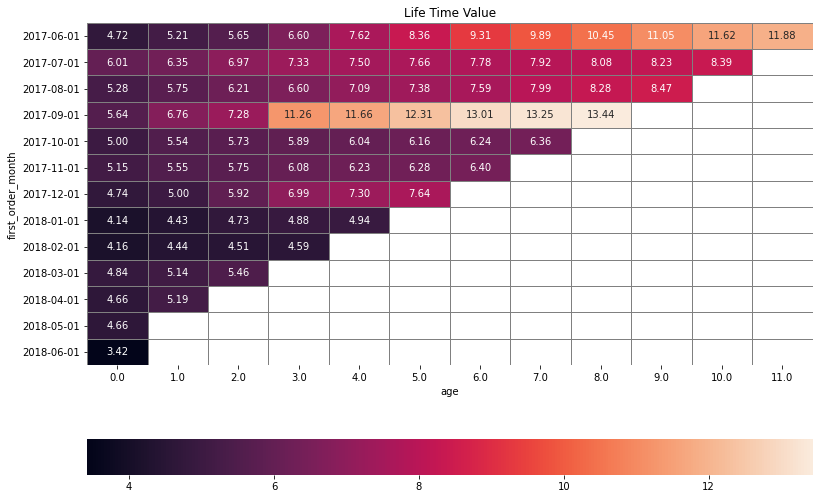

In [54]:
ltv_cohort_piv=ltv_cohort.pivot_table(index='first_order_month', columns='age',values='ltv',aggfunc='sum').cumsum(axis=1)
plt.figure(figsize=(13, 9))
ltv_cohort_piv.index=ltv_cohort_piv.index.astype(str)
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} ).set(title ='Life Time Value')
plt.show()

We see that the LTV of the customers varies a bit between cohorts, the first the fourth cohort are very different from the others and their users' LTV grows each month. Now, we will check if there is a difference in LTV between different sources. 

In [55]:
ltv_per_source=orders.groupby(['source id'])[['uid','revenue']].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_per_source.columns=['source','buyers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']
ltv_per_source[['source', 'ltv']]

,source,ltv
0,1,10.724577
1,2,13.383802
2,3,5.204931
3,4,5.506685
4,5,7.592558
5,7,1.220000
6,9,5.293566
7,10,3.348631


Sources 1 and 2 have the highest lifetime values while source 7 has the lowest.

##### In summary, the great majority of the users that order do it within the first 24 hours, but most of them do not order again. The buyers are divided by monthly cohorts that behave pretty much the same except for the first and fourth cohort which show higher rates of customer lifetime value and higher average order rates as time passes. Over time, the average amount of revenue is getting smaller  but the average revenue per order grows, meaning that users that keep using the product are increasing the amount they spend in each order. Looking on the sales through the sources that led the users to the product,  we see that in terms of  revenue, source 7 does not produce sales almost at all, source 1-5 shoew similar performance and sources 9-10 show low performance. In terms of LTV, sources 1 and 2 have much higher values than other sources.

### Marketing

#### Calculating amount of money spent


In [56]:
costs['month'] = costs['dt'].values.astype('datetime64[M]')

In [57]:
monthly_sales= orders.groupby('month')['revenue'].sum().reset_index()
monthly_costs= costs.groupby('month')['costs'].sum().reset_index()
monthly_sales_costs=pd.merge(monthly_costs, monthly_sales, on='month')
#monthly_sales_costs.head()

In [58]:
buyers_per_month = orders.groupby(['first_order_month'])['uid'].nunique().reset_index()
buyers_per_month.columns=['cost_month', 'buyers']
#buyers_per_month.head()

In [59]:
monthly_costs.columns= ['cost_month', 'marketing_costs']

In [60]:
CAC_per_month=monthly_costs.merge(buyers_per_month,how='left',on=['cost_month'])
CAC_per_month['CAC']=CAC_per_month['marketing_costs']/CAC_per_month['buyers']
CAC_per_month.head()

,cost_month,marketing_costs,buyers,CAC
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327


In [61]:
source_costs = costs.groupby(['source_id','month'])['costs'].sum().reset_index()
source_cost = costs.pivot_table(values='costs', index='month', columns='source_id', aggfunc='sum')

 The total marketing costs are 329131.62
 Costs Vs. Revenue by month: 
 


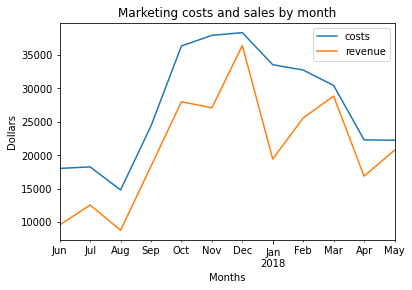

The customer acquisition costs over time:


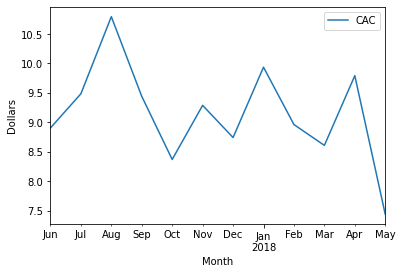

 The total marketing costs for every source: 
 source_id        1         2          3        4        5        9        10
costs      20833.27  42806.04  141321.63  61073.6  51757.1  5517.49  5822.49 


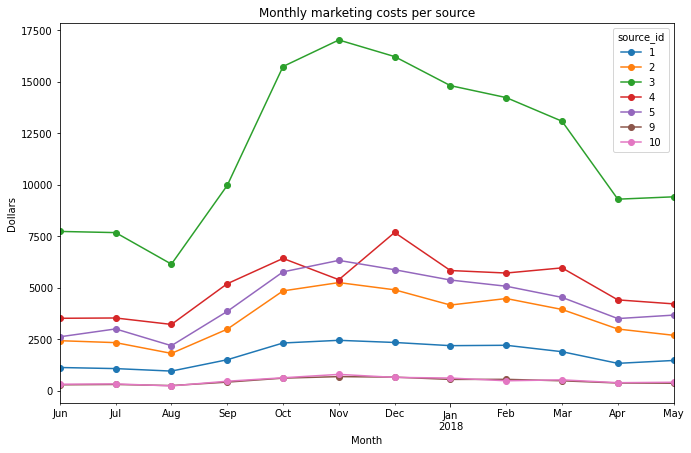

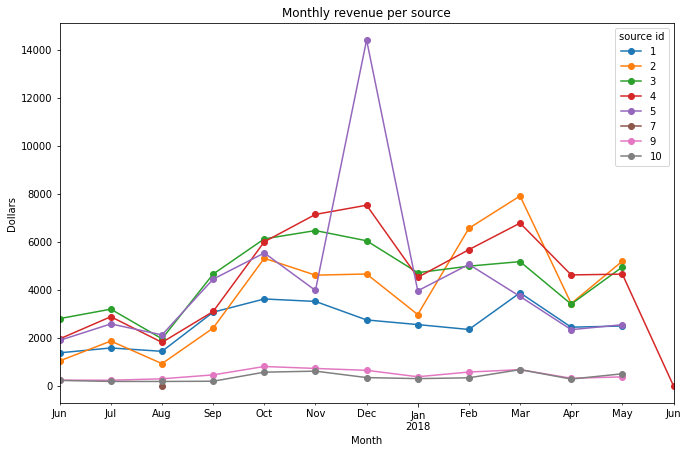

In [62]:
print(f" The total marketing costs are {costs['costs'].sum()}\n Costs Vs. Revenue by month: \n ")
monthly_sales_costs.plot(x='month', xlabel='Months',title='Marketing costs and sales by month', ylabel='Dollars')
plt.show()
print(f"The customer acquisition costs over time:")
CAC_per_month[['cost_month', 'CAC']].plot(x='cost_month')
plt.xlabel('Month')
plt.ylabel('Dollars')
plt.show()
print(f" The total marketing costs for every source: \n {source_costs.pivot_table(values='costs', columns='source_id', aggfunc='sum')} ")
source_cost_plt= source_cost.plot(figsize=(11,7), style='o-',title="Monthly marketing costs per source", xlabel='Month', ylabel='Dollars')
source_orders.plot(figsize=(11,7), style='o-',title="Monthly revenue per source", xlabel='Month', ylabel='Dollars')
plt.show()

We see that the marketing costs are higher than the sales overall, but in the popular months they are close to be balanced, this template is seen in the overall CAC graph - the highest costs are around July-August 17' where the marketing costs are not that high but the buyers' amount is low and the revenue is low too; in later months there are inclines and declines that are affected by the marketing costs and the number of buyers.
We see that the marketing costs for source num. 3 are much higher compared to all other sources. Interestingly, when comparing the marketing costs with revenue per source, we see that source num. 3 doesn't show the best revenue as expected, compared to the marketing expenses, and we see a steep incline in the revenue through source 5 in the most popular months.

#### customer acquisition from each of the sources cost

In [63]:
source_costs.columns = ['source','cost_month', 'marketing_costs']
#source_costs

In [64]:
buyers_per_month_source=orders.groupby(['first_order_month', 'source id'])['uid'].nunique().reset_index()
buyers_per_month_source.columns=['cost_month','source','buyers']
#buyers_per_month_source.head()

In [65]:
cac_per_month_source = source_costs.merge(buyers_per_month_source, on=['cost_month', 'source'])
cac_per_month_source['cac'] = cac_per_month_source['marketing_costs']/cac_per_month_source['buyers']
#cac_per_month_source.head()
cac_per_source = cac_per_month_source.groupby(['source'])[['marketing_costs', 'buyers']].sum()
cac_per_source['cac']= cac_per_source['marketing_costs']/cac_per_source['buyers']


 The customer aquisition cost per source: 
               cac
source           
1        7.186364
2       12.209367
3       13.493901
4        5.932356
5        7.467479
9        5.071222
10       4.381106


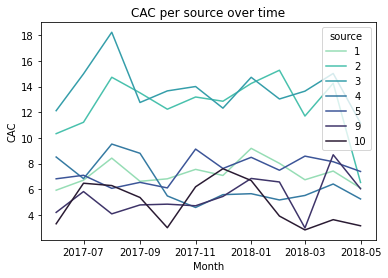

In [66]:
print(f" The customer aquisition cost per source: \n {cac_per_source[['cac']]}")
palette = sns.color_palette("mako_r",7)
sns.lineplot(data=cac_per_month_source, x="cost_month", y="cac", hue='source',  palette=palette)
plt.title('CAC per source over time')
plt.xlabel('Month')
plt.ylabel('CAC')
plt.show()

As seen earlier, source 3 and 2 have highest CAC overall and through all the months, meaning that the marketing costs compared to number of users that order in each month is higher than this ratio in other sources.

#### ROI

In [67]:
CAC_per_month_ROI=CAC_per_month[['cost_month','CAC']]
CAC_per_month_ROI.columns=['first_order_month','CAC']
#CAC_per_month_ROI

In [68]:
ROI = ltv_cohort.merge(CAC_per_month_ROI,on=['first_order_month'],how='left')
ROI.head()

,first_order_month,month,revenue,cohort_size,age,ltv,CAC
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531,8.905091


In [69]:
ROI['ROI']=ROI['ltv']/ROI['CAC']
roi_piv = ROI.pivot_table(index='first_order_month', columns='age', values='ROI', aggfunc='mean').cumsum(axis=1).round(2) 
#roi_piv

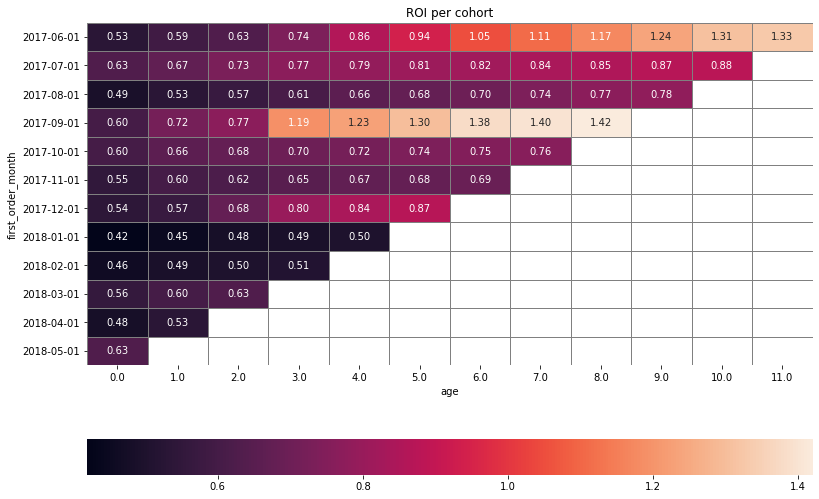

In [70]:
roi_piv.index=roi_piv.index.astype(str)
plt.figure(figsize=(13, 9))
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} ).set(title ='ROI per cohort')
plt.show()

We see that return of investment happens only in two cohorts and only after few months. In the first 3 months the cohorts behave the same and only at age 3 and later, we start to see differences in terms of ROI. Now we will check if there are differences in ROI between sources:

In [71]:
costs_per_source = source_costs.groupby('source')['marketing_costs'].sum().reset_index()
costs_per_source

,source,marketing_costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [72]:
roi_per_source=costs_per_source.merge(ltv_per_source, on='source')
roi_per_source['cac']=roi_per_source['marketing_costs']/roi_per_source['buyers']
roi_per_source['roi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source

,source,marketing_costs,buyers,revenue,ltv,cac,roi
0,1,20833.27,2899,31090.55,10.724577,7.186364,1.492351
1,2,42806.04,3506,46923.61,13.383802,12.209367,1.096191
2,3,141321.63,10473,54511.24,5.204931,13.493901,0.385725
3,4,61073.60,10296,56696.83,5.506685,5.931779,0.928336
4,5,51757.10,6931,52624.02,7.592558,7.467479,1.016750
5,9,5517.49,1088,5759.40,5.293566,5.071222,1.043844
6,10,5822.49,1329,4450.33,3.348631,4.381106,0.764335


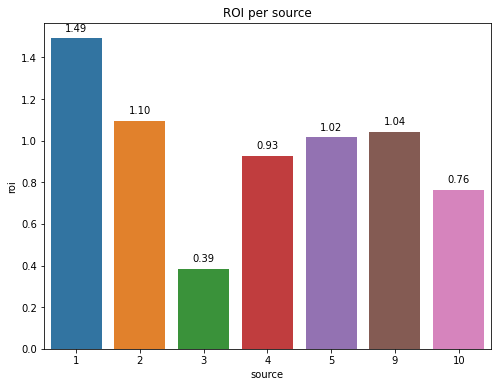

In [73]:
fig= plt.subplots(figsize=(8, 6))
chart = sns.barplot(data=roi_per_source[['source', 'roi']], x='source', y='roi')
plt.title('ROI per source')
chart.set_xticklabels(chart.get_xticklabels())
for p in chart.patches:
    chart.annotate("{:,.2f}".format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

As seen in the graph, the source with the highest rate of return of investment in source 1, after him source 2 (that showed earlier high ltv score), then sources 9,5,4,10 and the lowest is source number 3. Source 7 ommited from the data because the company did not pay for marketing in this channel. 

##### In summary: 
The users of the product have a bit more than 1 session a day in average, each session duration varies but the median value is one minute. Due to its purpose and the date in the databases, users were devided by monthly cohorts, most of the cohorts act in the same manner but the first and fourth cohorts present different user behavior that leads to higher rates of LTV and ROI. Although most of the users order from the product within their first day of usage, their ROI becomes positive only after few months of usage. A few source were highlighted during the analysis: source 3 had the highest marketing costs, source 5 had a significant peak and considerably high values of revenues, source 2 had high customer acquisition costs but showed, with source 1, the highest return of investment rates.
###### We would suggest the company keep investing in sources 2 and 5, source 2 shows high LTV value, meaning that through the lifetime of the customers they bring high revenues to the company. Although the customer acquisition costs are high, the revenue these customers bring makes the investment worth it. Source 5 shows also good ROI but considered better than the other sources because its total revenues much higher compared to other sources with ROI>1.